Choose one or two of the images on the web or use an image of your own choice.  If you use a different image, be careful that the image has not been saved under JPEG using a high level of compression.  This often introduces artifacts into the image that confound subsequent analyses of the results.  For the most part, you should apply your operators to a gray-scale version of the image. 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

%matplotlib inline

1. (20 points) Generate the [histogram](https://datacarpentry.org/image-processing/05-creating-histograms/) of the image you are using, and then perform a number of histogram operations (at least including contrast enhancement, thresholding, and equalization) to make the image visually better for either viewing or processing (10 points).  If it is a color image,  please first turn it into an intensity image and then generate its histogram.  Try to display your histograms of the original and the processed images (5 points), and make some observations of the images based on their histograms (5 points). What are the general distributions of the intensity values of each histogram? How many major peaks and valleys does your histogram have, and how do they behave? How could you use the histograms to understand, analyze or segment the image?

In [57]:
'''Import Image'''

InputImage = 'AWEBImage.jpg'#There is a difference btwn .jpeg and jpg. jpg is a Web Image. jpeg may be compressed.
InputImage = plt.imread(InputImage)

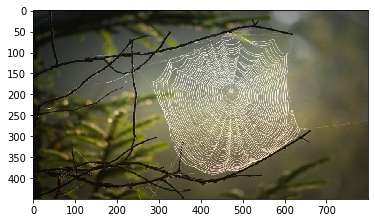

In [51]:
plt.imshow(InputImage)

https://researchmatters.in/news/weaving-web-wonder

In [52]:
C = np.array(InputImage)
C

array([[[29, 25, 16],
        [30, 26, 17],
        [31, 27, 18],
        ...,
        [65, 69, 54],
        [65, 69, 52],
        [65, 69, 52]],

       [[29, 25, 16],
        [30, 26, 17],
        [31, 27, 18],
        ...,
        [66, 70, 55],
        [65, 69, 52],
        [65, 69, 52]],

       [[29, 25, 16],
        [30, 26, 17],
        [31, 27, 18],
        ...,
        [66, 70, 55],
        [66, 70, 55],
        [65, 69, 54]],

       ...,

       [[12, 11,  6],
        [12, 11,  6],
        [12, 11,  6],
        ...,
        [47, 44, 27],
        [47, 44, 27],
        [47, 44, 27]],

       [[13, 12,  8],
        [13, 12,  8],
        [13, 12,  8],
        ...,
        [49, 46, 29],
        [49, 46, 29],
        [50, 47, 30]],

       [[13, 12,  8],
        [13, 12,  8],
        [13, 12,  8],
        ...,
        [49, 46, 29],
        [49, 46, 29],
        [50, 47, 30]]], dtype=uint8)

In [58]:
C.shape

(450, 800, 3)

In [59]:
C[:,:,].shape

(800, 3)

In [102]:
'''create the histogram'''

def imageGray(image):
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    grayScale = 0.2989*R + 0.5870*G + 0.1140*B 
    return grayScale

def imagePeak(image):
    cleanImage = image[np.logical_not(np.isnan(image))]
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))
    return histogram, bin_edges

def imageContrast(image):
    cleanImage = image[np.logical_not(np.isnan(image))]
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))
    return histogram, bin_edges

def imageHist(image):
    hist,bins = np.histogram(image.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    return cdf_normalized, hist, bins

def imageThreshold(image):
    cleanImage = image[np.logical_not(np.isnan(image))]
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))
    return histogram, bin_edges

def imageEqualize(image,cdf):
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    return cdf[img]


# Color Histogram

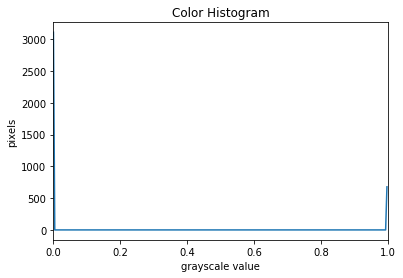

In [60]:
'''configure and draw the histogram figure'''

plt.figure()
plt.title("Color Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here
histogram, bin_edges = imageHist(C)
plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

# Grayscale Peaks

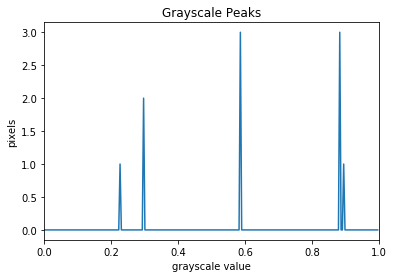

In [68]:
'''configure and draw the histogram figure'''

plt.figure()
plt.title("Grayscale Peaks")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

grayImage = imageGray(C)
histogram, bin_edges = imagePeak(grayImage)

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

plt.imshow(grayImage, cmap = 'gray')

### The histogram has 5 peaks (and 7 valleys) for the grayscale. The two major peaks are likely corresponding to the web and twigs in the foreground. The remaing peaks most likely pertain to interpretable elements in the background such as the tree branches, highlights, and leaves. The distribution at first looks random, but the 3 major peaks seem to be evenly spread out, which resembles modal behavior. Compared to the color histogram, the grayscale histograms picks out more than just foreground behavior. By using functions for contrast enhancement, equalization, and threshold we begin to identify which elements in the foreground and background are segmented relative to the peaks of the histogram.

# Grayscale Histogram

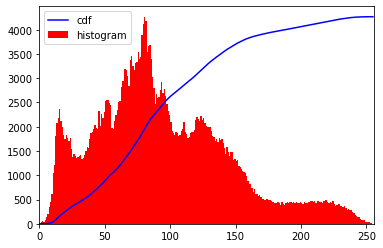

In [111]:
cdf_normalized,hist, bins = imageHist(grayImage)

plt.plot(cdf_normalized, color = 'b')
plt.hist(grayImage.flatten(),256,[0,256],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [108]:
len(grayImage[0])

800

2. (20 points) Apply BOTH the 1×2 operator and Sobel operator to your image and analyze and compare the results of the gradient magnitude images (including vertical gradients, horizontal gradients, and the combined) (10 points). Please don’t forget to normalize your gradient images, noting that the original vertical and horizontal gradients have both positive and negative values. I would recommend you to display the absolute values of the horizontal and vertical gradient images.  Does the Sobel operator have any clear visual and processing advantages over the 1×2 operator? Any disadvantages (5 points)? If you subtract the normalized 1×2 gradient image from the normalized Sobel gradient image, are there any residuals? You might use two different types of images: one ideal man-made image, and one image of a real scene with more details (5 points). (Note: don’t forget to normalize your results as shown in the slides of  feature extraction lecture: part 2)

3. (20 points) Generate edge maps of the above two combined gradient maps (10 points).  An edge image should be a binary image with 1s as edge points and 0s as non-edge points. You may first generate a histogram of each combined gradient map,  and only keep certain percentage of pixels  (e.g.  5% of the pixels with the highest gradient  values) as edge pixels (edgels) . Please study what is the best percentage for a specific image, and why. Use the varying percentage to automatically find a corresponding threshold for the gradient magnitudes, and then pick up the one having the best visual performance. In your report, please write up the description and probably equations for finding the threshold, and discuss what percentage is a good value (5 points). You may also consider to use local, adaptive thresholds to different portions of the image so that all major edges will be shown up nicely (5 points). In the end, please try to generate a sketch of an image, such as the ID image of Prof. Zhu.

4. (20 points) What happens when you increase the size of the edge detection kernel from 1×2 to 3×3 and then to 5×5 , or 7×7? Discuss (1) computational cost (in terms of members of operations, and the real machine running times – 5 points); (2) edge detection results (5 points) and (3) sensitivity to noise, etc. (5 points). Note that your larger kernel should still be an edge detector. Please list your kernels as matrices in your report, and tell us what they are good for (5 points).

5.  (20 points) Suppose you apply the Sobel operator to each of the RGB color bands of a color image.  How might you combine these results into a color edge detector (5 points)?  Do the resulting edge differ from the gray scale results?  How and why (5 points)? You may compare the edge maps of the intensity image (of the color image), the gray-scale edge map that are the combination of the three edge maps from three color bands, or a real color edge map that edge points have colors (5 points). Please discuss their similarities and differences, and how each of them can be used for image enhancement or feature extraction (5 points). Note that you want to first generate gradient maps and then using thresholding to generate edge maps.  In the end, please try to generate a color sketch of an image, such as the ID image of Prof. Zhu. You may also consider local, adaptive thresholding in generating a color edge map.